Dataset structure:
Index(['T', 'Y', 'Z0', 'Z1', 'Z2', 'Z3', 'Z4', 'Z5', 'Z6', 'Z7',
       ...
       'Z90', 'Z91', 'Z92', 'Z93', 'Z94', 'Z95', 'Z96', 'Z97', 'Z98', 'Z99'],
      dtype='object', length=102)
Number of unique treatment effects (T): 992322
Range of treatment effects (T): -4.665395736694336 to 4.764590263366699
Number of unique outcomes (Y): 992374
Range of outcomes (Y): -11.398209571838379 to 10.687490463256836


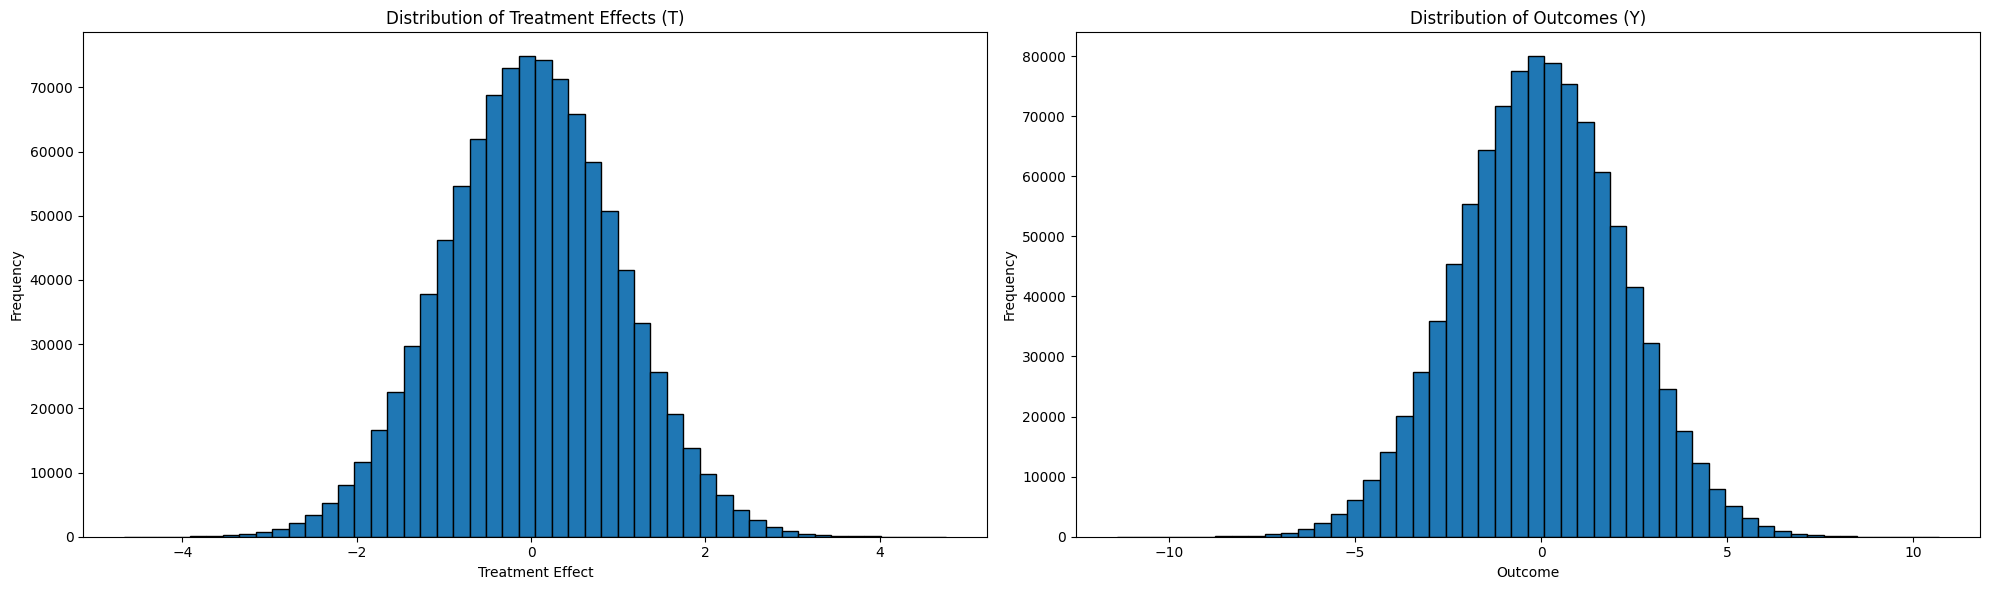

In [3]:
import os
import sys
import pandas as pd
from datasets import load_from_disk
from tqdm import tqdm
import matplotlib.pyplot as plt

# Add the project root to the Python path
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(project_root)

from src.data.tabular_datamodule import TabularDataModule
from src.utils import Config

# Load the dataset
data_dir = './data/lennon100-range-tau-10k/validation'
dataset = load_from_disk(data_dir)

dataset = dataset.to_pandas()

# Print basic information about the dataset
print("Dataset structure:")
print(dataset.columns)

# Check the unique treatment effects (T) and outcomes (Y)
unique_T = dataset['T'].unique()
unique_Y = dataset['Y'].unique()

print(f"Number of unique treatment effects (T): {len(unique_T)}")
print(f"Range of treatment effects (T): {min(unique_T)} to {max(unique_T)}")
print(f"Number of unique outcomes (Y): {len(unique_Y)}")
print(f"Range of outcomes (Y): {min(unique_Y)} to {max(unique_Y)}")

# Plot the distribution of treatment effects (T) and outcomes (Y)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

ax1.hist(dataset['T'], bins=50, edgecolor='black')
ax1.set_title('Distribution of Treatment Effects (T)')
ax1.set_xlabel('Treatment Effect')
ax1.set_ylabel('Frequency')

ax2.hist(dataset['Y'], bins=50, edgecolor='black')
ax2.set_title('Distribution of Outcomes (Y)')
ax2.set_xlabel('Outcome')
ax2.set_ylabel('Frequency')

plt.tight_layout()
